# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Muhammad Nur Irfan
- **Email:** itzirfanmt@gmail.com
- **ID Dicoding:** Muhammad Nur Irfan

## Menentukan Pertanyaan Bisnis

- Berapa Jumlah User Total saat ini ?
- Bagaimana Status Order yang sedang terjadi saat ini ?
- Bagaimana perkembangan order sampai saat ini ?
- Bagaimana Persebaran Order Review sampai saat ini ?
- Apa Kategory terbaik dan terburuk pada order ?
- Apa Persebaran Negara asal Customer melakukan order ?
- Bagaimana RFM Analysis terhadap data yang kita miliki ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')
geolocation_df = geolocation_df.drop_duplicates() # Untuk meringankan proses komputasi karena banyak all_merge yang duplikat sehingga untuk melakukan keseluruhan proses dibutuhkan waktu yang cukup lama
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_df = pd.read_csv('data/order_payments_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_dataset_df = pd.read_csv('data/orders_dataset.csv')
orders_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_name_df = pd.read_csv('data/product_category_name_translation.csv')
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
product_dataset_df = pd.read_csv('data/products_dataset.csv')
product_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_dataset_df = pd.read_csv('data/sellers_dataset.csv')
sellers_dataset_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Berdasarkan Dataset yang tersedia, dataset yang dapat menjawab pertanyaan bisnis adalah :
- **Dataset Customers** :
1. customers_id = sebagai ID Merge
2. customer_unique_id = mengetahui jumlah customer
3. customers_state = mengetahaui persebaran customer
4. customer_zip_code_prefix = mengambil kordinat customer & sebagai ID Merge

- **Dataset Geolocation** :
1. geolocation_zip_code_prefix = mengambil kordinat customer
2. geolocation_lat = mengambil kordinat latitude customer
3. geolocation_lng = mengambil kordinat longitude customer

- **Dataset Orders Item** :
1. order_id = menghitung banyak order & sebagai ID merge
2. product_id = mengetahui product yang terjual
3. price = menghitung revenue 
4. seller_id = mengetahui seller yang berperan besar dalam penjualan

- **Dataset Orders Dataset** :
1. order_id = sebagai ID merge
2. customer_id = mengetahui customer yang valid melakukan order
3. order_status = mengetahui status order
4. order_approved_at = mengetahui order yang valid + mengetahui waktu order

- **Dataset Products** :
1. product_id = sebagai ID merge
2. product_category_name = mengetahui nama kategori

- **Dataset Product category name translation** :
1. product_category_name = sebagai ID merge
2. product_category_name_english = mengetahui nama kategori dalam ingris

- **Dataset Order Review** : 
1. order_id = sebagai ID merge
2. review_score = mengetahui review score dari order

Berikut adalah Skema yang diperlukan untuk melakukan Merge

![Dicoding Ecommerce.png](<attachment:Dicoding Ecommerce.png>)
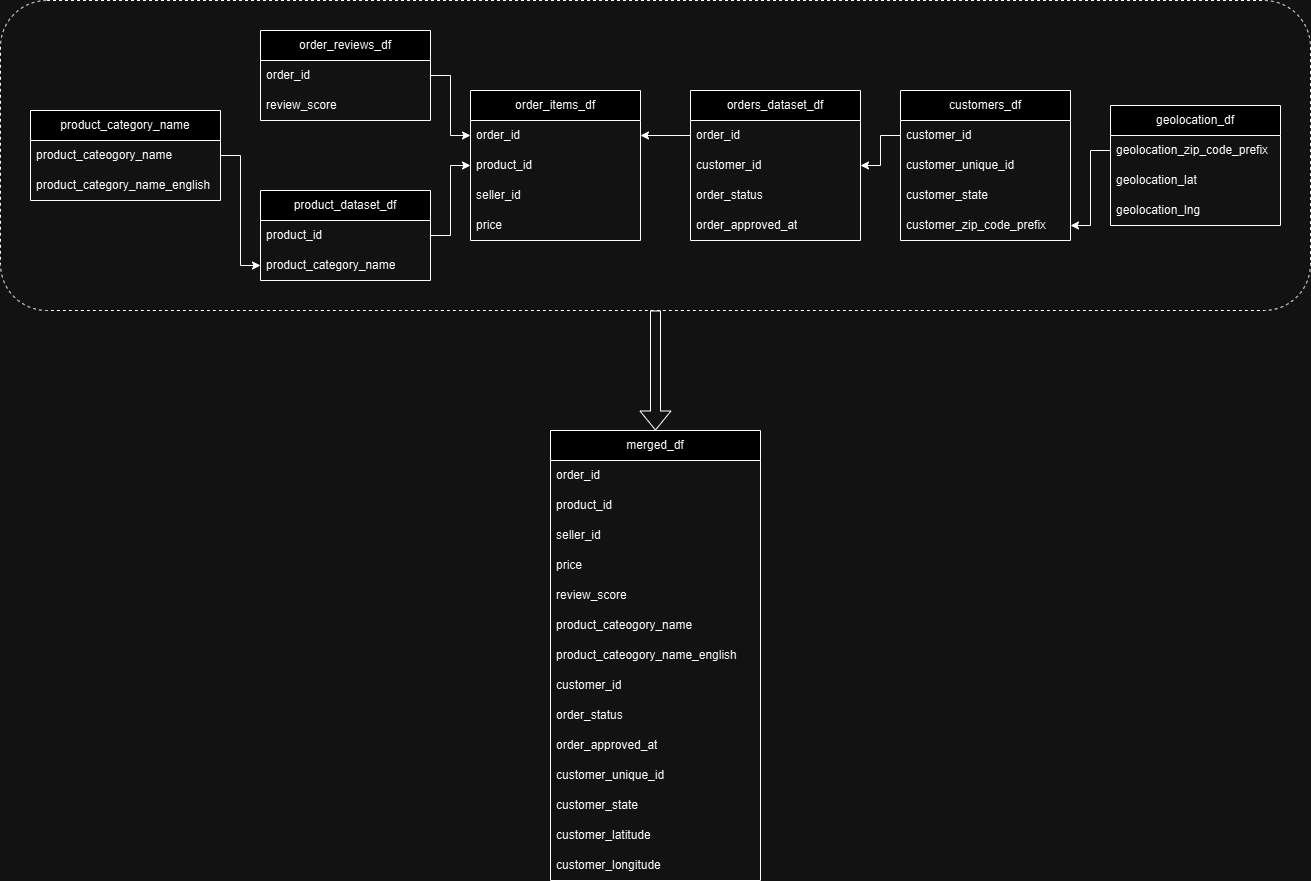

**Proses Merge Data**

In [11]:
#Menggabungkan product_category_name_df dengan product_dataset_df
merge1 = pd.merge(product_category_name_df, product_dataset_df[['product_id', 'product_category_name']], on="product_category_name", how="right")
merge1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          32341 non-null  object
 1   product_category_name_english  32328 non-null  object
 2   product_id                     32951 non-null  object
dtypes: object(3)
memory usage: 772.4+ KB


In [12]:
#Menggabungkan geolocation_df dengan customers_df
merge2 = pd.merge(customers_df[['customer_id', 'customer_unique_id', 'customer_state', 'customer_zip_code_prefix']], 
                  geolocation_df[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']],
                  how="left" , 
                  left_on = 'customer_zip_code_prefix', 
                  right_on = 'geolocation_zip_code_prefix' )

merge2.drop(columns=['geolocation_zip_code_prefix'], inplace=True) # menghapus kolom geolocation_zip_code_prefix karena tidak dibutuhkan lagi
merge2.rename(columns={'geolocation_lat': 'customer_lat', 'geolocation_lng' : 'customer_lng'}, inplace=True) # Mengganti nama kolom agar mudah dipahami
merge2 = merge2.drop_duplicates(subset=['customer_zip_code_prefix'])

In [13]:
merge2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14994 entries, 0 to 10324422
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               14994 non-null  object 
 1   customer_unique_id        14994 non-null  object 
 2   customer_state            14994 non-null  object 
 3   customer_zip_code_prefix  14994 non-null  int64  
 4   customer_lat              14837 non-null  float64
 5   customer_lng              14837 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 820.0+ KB


In [14]:
#Melakukan merge orders_dataset dengan merge geolocation df & customers df
merge3 = pd.merge(orders_dataset_df[['order_id', 'customer_id', 'order_status', 'order_approved_at']], merge2, on="customer_id", how="left")
merge3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  99441 non-null  object 
 1   customer_id               99441 non-null  object 
 2   order_status              99441 non-null  object 
 3   order_approved_at         99281 non-null  object 
 4   customer_unique_id        14994 non-null  object 
 5   customer_state            14994 non-null  object 
 6   customer_zip_code_prefix  14994 non-null  float64
 7   customer_lat              14837 non-null  float64
 8   customer_lng              14837 non-null  float64
dtypes: float64(3), object(6)
memory usage: 6.8+ MB


In [15]:
#Melakukan merge order_items_df dengan merge geolocation,customers,order_dataset df
merge4 = pd.merge(order_items_df[['order_id', 'product_id', 'price']], merge3, on="order_id", how="left")
merge4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  112650 non-null  object 
 1   product_id                112650 non-null  object 
 2   price                     112650 non-null  float64
 3   customer_id               112650 non-null  object 
 4   order_status              112650 non-null  object 
 5   order_approved_at         112635 non-null  object 
 6   customer_unique_id        16858 non-null   object 
 7   customer_state            16858 non-null   object 
 8   customer_zip_code_prefix  16858 non-null   float64
 9   customer_lat              16689 non-null   float64
 10  customer_lng              16689 non-null   float64
dtypes: float64(4), object(7)
memory usage: 9.5+ MB


In [16]:
#Melakukan merge order_reviews dengan merge geolocation,customers,order_dataset,order_items df
merge5 = pd.merge(order_reviews_df[['order_id', 'review_score']], merge4, on="order_id", how="right")

In [17]:
#Menggabungkan seluruh merge menjadi 1 sesuai dengan Skema
all_merged = pd.merge(merge1, merge5, on="product_id", how="right")
all_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_category_name          111702 non-null  object 
 1   product_category_name_english  111678 non-null  object 
 2   product_id                     113314 non-null  object 
 3   order_id                       113314 non-null  object 
 4   review_score                   112372 non-null  float64
 5   price                          113314 non-null  float64
 6   customer_id                    113314 non-null  object 
 7   order_status                   113314 non-null  object 
 8   order_approved_at              113299 non-null  object 
 9   customer_unique_id             16932 non-null   object 
 10  customer_state                 16932 non-null   object 
 11  customer_zip_code_prefix       16932 non-null   float64
 12  customer_lat                  

## Assessing Data

#### **A. Mengidentifikasi Missing Values**

Mencari Missing Value pada Data Frame yang ada

In [18]:
all_merged.isnull().sum()

product_category_name             1612
product_category_name_english     1636
product_id                           0
order_id                             0
review_score                       942
price                                0
customer_id                          0
order_status                         0
order_approved_at                   15
customer_unique_id               96382
customer_state                   96382
customer_zip_code_prefix         96382
customer_lat                     96553
customer_lng                     96553
dtype: int64

#### **B. Mengidentifikasi Duplikasi Data**

In [19]:
all_merged.duplicated().sum()

np.int64(10662)

Data yang memiliki Duplikasi adalah Data hasil dari penggabungan geolocation_df, hal ini perlu dihapus terlebih dahulu untuk sebelum melakukan cleaning lainnya

#### **C. Mengidentifikasi Type Data yang salah**

In [20]:
all_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_category_name          111702 non-null  object 
 1   product_category_name_english  111678 non-null  object 
 2   product_id                     113314 non-null  object 
 3   order_id                       113314 non-null  object 
 4   review_score                   112372 non-null  float64
 5   price                          113314 non-null  float64
 6   customer_id                    113314 non-null  object 
 7   order_status                   113314 non-null  object 
 8   order_approved_at              113299 non-null  object 
 9   customer_unique_id             16932 non-null   object 
 10  customer_state                 16932 non-null   object 
 11  customer_zip_code_prefix       16932 non-null   float64
 12  customer_lat                  

Terdapat beberapa kesalahan dalam Tipe Data:
- order_approved_at dari object menjadi **timestamp**


#### **D. Mengidentifikasi Invalid Input**

In [21]:
all_merged.describe(include="all")

,product_category_name,product_category_name_english,product_id,order_id,review_score,price,customer_id,order_status,order_approved_at,customer_unique_id,customer_state,customer_zip_code_prefix,customer_lat,customer_lng
count,111702,111678,113314,113314,112372.000000,113314.000000,113314,113314,113299,16932,16932,16932.000000,16761.000000,16761.000000
unique,73,71,32951,98666,NaN,NaN,98666,7,90174,14885,27,NaN,NaN,NaN
top,cama_mesa_banho,bed_bath_table,aca2eb7d00ea1a7b8ebd4e68314663af,5a3b1c29a49756e75f1ef513383c0c12,NaN,NaN,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,2018-02-24 03:20:27,c402f431464c72e27330a67f7b94d4fb,SP,NaN,NaN,NaN
freq,11270,11270,527,22,NaN,NaN,22,110840,23,20,6420,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,4.032473,120.478701,NaN,NaN,NaN,NaN,NaN,40108.620009,-19.883194,-46.154748
std,NaN,NaN,NaN,NaN,1.387849,183.279678,NaN,NaN,NaN,NaN,NaN,31391.161642,6.827219,4.812205
min,NaN,NaN,NaN,NaN,1.000000,0.850000,NaN,NaN,NaN,NaN,NaN,1003.000000,-36.605374,-72.666706
25%,NaN,NaN,NaN,NaN,4.000000,39.900000,NaN,NaN,NaN,NaN,NaN,9429.000000,-23.583555,-48.818408
50%,NaN,NaN,NaN,NaN,5.000000,74.900000,NaN,NaN,NaN,NaN,NaN,34350.000000,-22.837859,-46.641607
75%,NaN,NaN,NaN,NaN,5.000000,134.900000,NaN,NaN,NaN,NaN,NaN,70274.250000,-16.637430,-43.463623


Tidak terdapat Invalid Input yang berpengaruh

#### **Insight**


- **Tipe Data :**\
order_approved_at dari object menjadi **timestamp**
-------
- **Missing Value:**\
Untuk data awal, missing value yang dimiliki oleh all_merged dataframe adalah :\
Terdapat **1612** missing value pada kolom product_category_name\
Terdapat **1636** missing value pada kolom product_category_name_english\
Terdapat **942** missing value pada kolom review_score\
Terdapat **96382** missing value pada kolom customer_unique_id\
Terdapat **96382** missing value pada kolom customer_state\
Terdapat **96382** missing value pada kolom customer_zip_code_prefix\
Terdapat **96553** missing value pada kolom customer_lat\
Terdapat **96553** missing value pada kolom customer_lng
--------
- **Duplicated Value:**\
Terdapat total **10662** data duplikat dalam all_merged dataframe

## Cleaning Data

**A. Menghilangkan Data yang Duplikat**

In [22]:
all_merged = all_merged.drop_duplicates()
all_merged.duplicated().sum()

np.int64(0)

**B. Menghilangkan Missing Values**

Menghilangkan customer_unique_id, customer_state, customer_zip_code_prefix, customer_lat, customer_lng dengan cara droping

In [24]:
all_merged['customer_unique_id'] = all_merged['customer_unique_id'].fillna('None')
all_merged['customer_state'] = all_merged['customer_state'].fillna('Unknown')
all_merged['product_category_name'] = all_merged['product_category_name'].fillna('Unknown')

all_merged['customer_zip_code_prefix'] = all_merged['customer_zip_code_prefix'].fillna(0)
all_merged['customer_lat'] = all_merged['customer_lat'].fillna(0)
all_merged['customer_lng'] = all_merged['customer_lng'].fillna(0)

all_merged.isnull().sum()

product_category_name               0
product_category_name_english    1486
product_id                          0
order_id                            0
review_score                      797
price                               0
customer_id                         0
order_status                        0
order_approved_at                  14
customer_unique_id                  0
customer_state                      0
customer_zip_code_prefix            0
customer_lat                        0
customer_lng                        0
dtype: int64

Missing value pada order_approved_at menunjukkan bahwa terdapat order yang tidak di-approved atau tidak valid, hal ini sebaiknya dihilangkan untuk memudahkan data cleaning

In [25]:
all_merged= all_merged.dropna(subset=['order_approved_at'])

Bisa saja ada order yang tidak diberikan review score, sehingga untuk order yang tidak memiliki review akan diberikan value 0 untuk menandakan order tersebut tidak emmiliki review

In [26]:
all_merged['review_score'] = all_merged['review_score'].fillna(0)
all_merged.isnull().sum()

product_category_name               0
product_category_name_english    1485
product_id                          0
order_id                            0
review_score                        0
price                               0
customer_id                         0
order_status                        0
order_approved_at                   0
customer_unique_id                  0
customer_state                      0
customer_zip_code_prefix            0
customer_lat                        0
customer_lng                        0
dtype: int64

Dengan adanya missing value pada 'product_category_name_english' menunjukkan ada beberapa produk yang tidak memiliki translate ke bahasa inggris.\
Daripada harus menghapus 1463 baris data, lebih baik mengisi 'product_category_name_english' dengan nama produk aslinya untuk mengurangi kehilangan data

In [27]:
all_merged['product_category_name_english'] = all_merged['product_category_name_english'].fillna(all_merged['product_category_name'])
all_merged.isnull().sum()

product_category_name            0
product_category_name_english    0
product_id                       0
order_id                         0
review_score                     0
price                            0
customer_id                      0
order_status                     0
order_approved_at                0
customer_unique_id               0
customer_state                   0
customer_zip_code_prefix         0
customer_lat                     0
customer_lng                     0
dtype: int64

**C. Merubah Type Data**

In [28]:
all_merged['order_approved_at'] = pd.to_datetime(all_merged['order_approved_at'])

## Exploratory Data Analysis (EDA)

### Exploratory All Data

Menentukan Banyaknya Customer yang telah melakukan order

In [29]:
total_users = all_merged['customer_unique_id'].nunique()
print(f"Total unique users: {total_users}")

Total unique users: 14884


Menentukan banyak Order yang telah terjadi

In [30]:
total_orders = all_merged['order_id'].nunique()
print(f"Total orders: {total_orders}")

Total orders: 98652


Menentukan jumlah Revenue yang dihasilkan oleh transaksi pemesanan

In [31]:
total_revenue = all_merged.groupby(by="price").order_id.nunique().sum()
print(total_revenue)

101256


Mencari insight antara asal negara dari customers terhadap revenue yang perusahaan dapatkan

In [32]:
all_merged.groupby(by="customer_state").agg({
    "customer_id" : "nunique",
    "price": ["max", "min", "mean"]
})

customer_id    price                   
                   nunique      max    min        mean
customer_state                                        
AC                      20  1200.00  12.90  176.555500
AL                     125  1079.99  13.90  185.096587
AM                      54  1688.00  12.90  170.448036
AP                      18   798.00  29.99  204.450556
BA                     729  2258.00   5.20  129.422377
CE                     383  2139.99  12.00  169.618886
DF                     464  1350.00   6.90  130.372382
ES                     265   719.88   9.00   99.700978
GO                     537  1623.90  10.00  122.184025
MA                     194  2199.00   9.90  168.867071
MG                    1339  4099.99   5.90  121.425075
MS                     185  2062.99  13.65  145.091230
MT                     174  1890.00  12.25  165.694176
PA                     209  2199.00   4.99  154.418721
PB                     181  3089.00  13.90  215.600213
PE                     439  1989.00   9.88  138.594933
PI                     154  1780.00  12.50  163.086815
PR                     851  2799.00   4.90  120.996522
RJ                    1189  2300.00   3.54  125.886392
RN                     175  1099.00  12.50  148.546077
RO                      74  1999.00   9.99  212.425733
RR                      15   699.00  13.65  179.610000
RS                     867  1449.00   5.18  112.648687
SC                     514  3105.00   6.00  132.642533
SE                      88  1670.00  16.04  163.209780
SP                    5548  6499.00   3.49  111.039647
TO                      96  1999.00   9.90  148.468713
Unknown              83765  6735.00   0.85  124.165904

mencari insight terhadap nama produk beserta revenuenya

In [33]:
all_merged.groupby(by="product_category_name_english").agg({
    "order_id" : "nunique",
    "price": ["max", "min", "mean"]
})

order_id    price                   
                               nunique      max    min        mean
product_category_name_english                                     
Unknown                           1450  3980.00   3.00  116.452727
agro_industry_and_commerce         182  2990.00  12.99  351.167650
air_conditioning                   253  1599.00  10.90  181.552874
art                                202  6499.00   3.50  118.104752
arts_and_craftmanship               23   289.49   9.80   75.583750
...                                ...      ...    ...         ...
stationery                        2311  1693.00   2.29   94.466009
tablets_printing_image              79   889.99  14.90   90.792532
telephony                         4198  2428.00   5.00   71.172483
toys                              3886  1699.99   4.90  119.301758
watches_gifts                     5624  3999.90   8.99  204.724138

[74 rows x 4 columns]

Mengetahui hari terakhir sejak adanya order approved

In [34]:
last_transaction_date = all_merged['order_approved_at'].max()

today = pd.to_datetime('today')
days_since_last_transaction = (today - last_transaction_date).days

print(f"The last transaction occurred on: {last_transaction_date}")
print(f"Number of days since the last transaction: {days_since_last_transaction} days")

The last transaction occurred on: 2018-09-03 17:40:06
Number of days since the last transaction: 2245 days


## Visualization & Explanatory Analysis

**Menghitung Total User pada Dataframe**

In [35]:
print(f"Total unique users: {total_users}")

Total unique users: 14884


**Menghitung Persebaran Status Order**

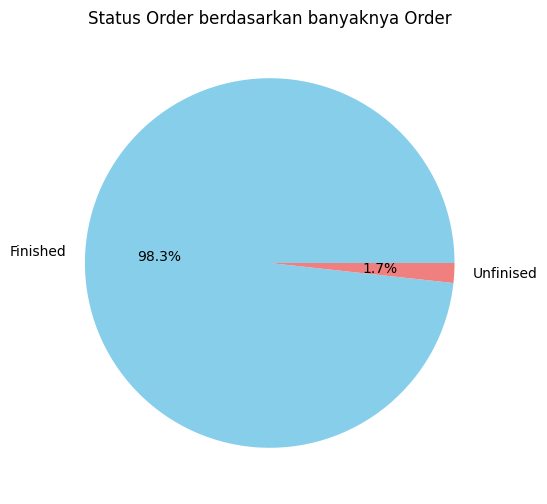

In [36]:
# Menghitung jumlah unik order berdasarkan status
status_order_count = all_merged.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

# Memetakan status
status_mapping = {
    'delivered': 'Finished',
    'shipped': 'Unfinised',
    'invoiced': 'Unfinised',
    'processing': 'Unfinised',
    'approved': 'Unfinised',
    'canceled': 'Finished',
    'unavailable': 'Unfinised'
}
all_merged['order_status'] = all_merged['order_status'].replace(status_mapping)

# Menghitung kategori
category_counts = all_merged['order_status'].value_counts()

# Menghitung persentase
category_percentages = (category_counts / category_counts.sum()) * 100

# Membuat pie chart
plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

# Menambahkan judul
plt.title('Status Order berdasarkan banyaknya Order')
plt.show()


**Perkembangan Order Sampai Saat ini**

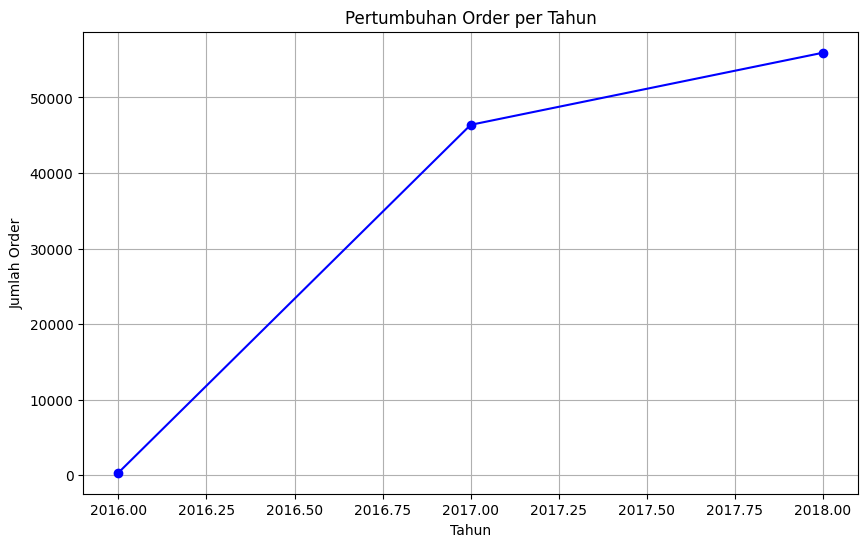

In [37]:
order_growth = order_per_year = all_merged.groupby(all_merged['order_approved_at'].dt.year)['order_id'].count()
# Membuat line chart
plt.figure(figsize=(10, 6))
order_growth.plot(kind='line', marker='o', color='blue', linestyle='-')

# Menambahkan judul dan label sumbu
plt.title('Pertumbuhan Order per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Order')

# Menampilkan line chart
plt.grid(True)
plt.show()

**Persebaran Rating pada Order Review**

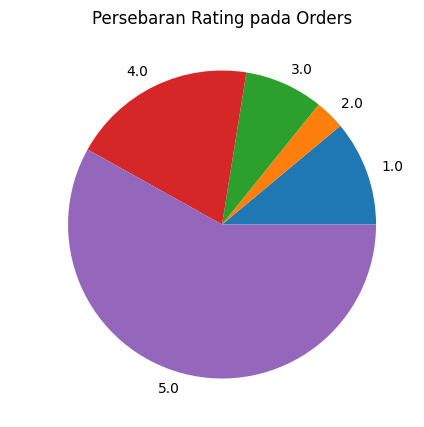

In [38]:
review_orders = all_merged.groupby(by="review_score").order_id.nunique()
filtered_review_orders = review_orders[review_orders.index != 0]
plt.figure(figsize=(10, 5))
filtered_review_orders.plot(kind='pie', color='blue')
plt.title("Persebaran Rating pada Orders")
plt.ylabel(" ")
plt.show()

**Mengetahui Category terbaik dan terburuk**

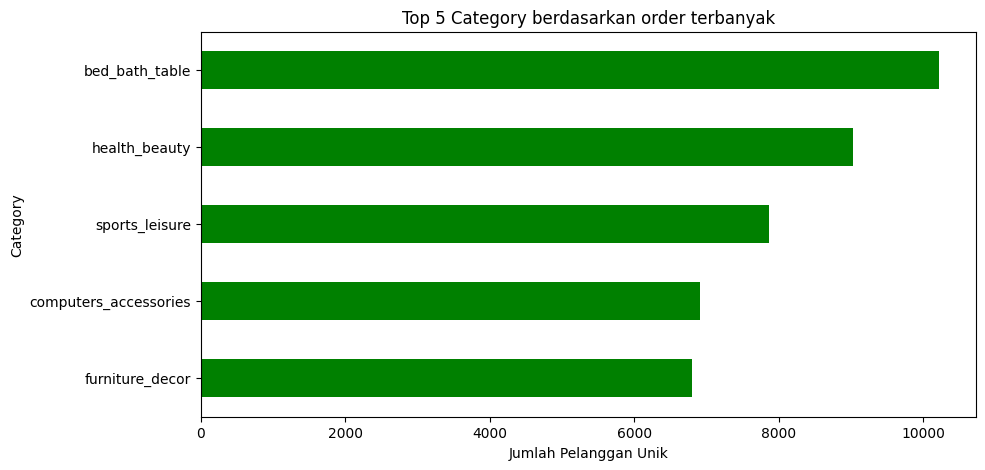

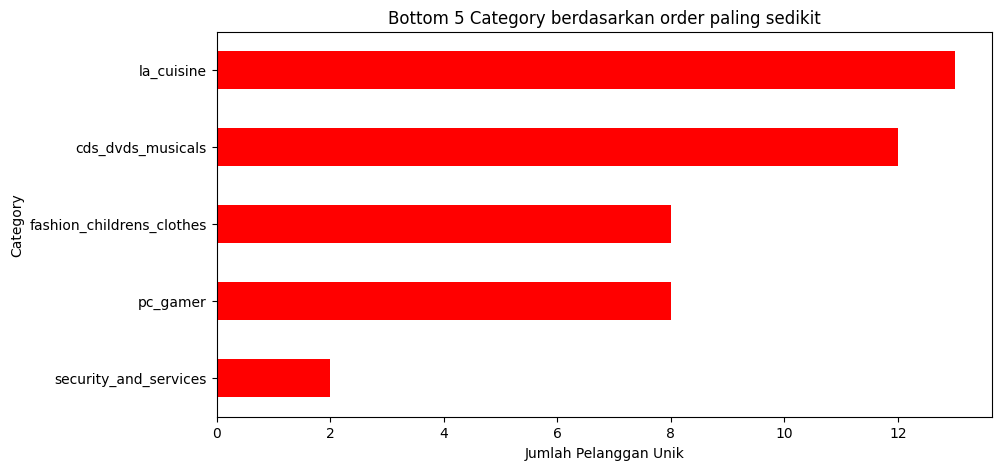

In [39]:

category_order_counts = all_merged.groupby('product_category_name_english')['order_id'].count().sort_values(ascending=False)

best_category = category_order_counts.head(5)
worst_category = category_order_counts.tail(5)

plt.figure(figsize=(10, 5))
best_category.plot(kind='barh', color='green')
plt.title("Top 5 Category berdasarkan order terbanyak")
plt.xlabel("Jumlah Pelanggan Unik")
plt.ylabel("Category")
plt.gca().invert_yaxis()
plt.show()

# Membuat plot untuk Worst 5
plt.figure(figsize=(10, 5))
worst_category.plot(kind='barh', color='red')
plt.title("Bottom 5 Category berdasarkan order paling sedikit")
plt.xlabel("Jumlah Pelanggan Unik")
plt.ylabel("Category")
plt.gca().invert_yaxis()
plt.show()

**Mengetahui Negara Customer yang melakukan Order paling banyak**

<Figure size 1200x800 with 0 Axes>

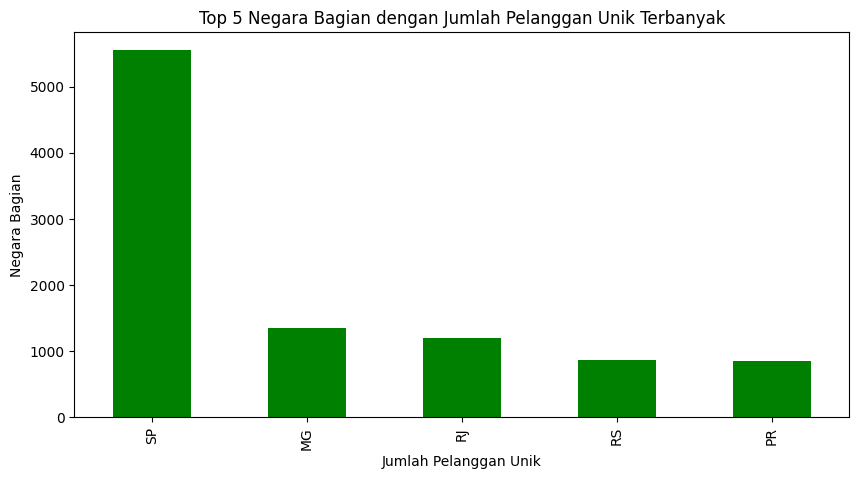

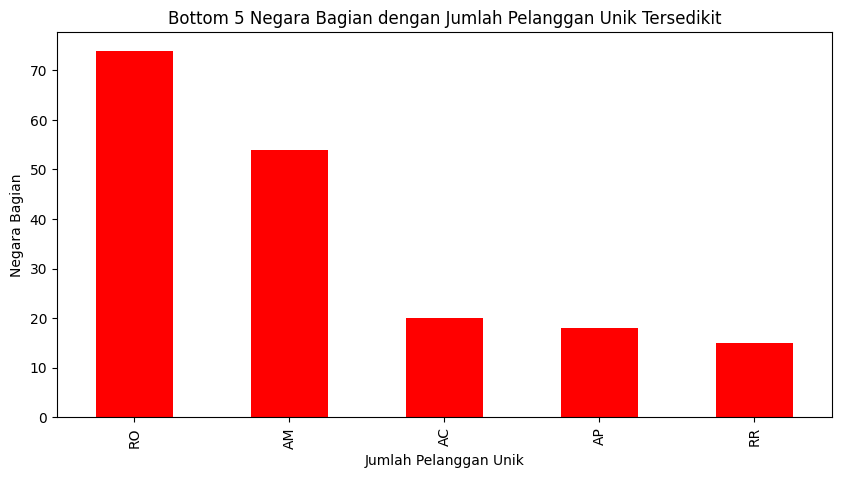

In [40]:
plt.figure(figsize=(12, 8))
cus_state_perform = all_merged.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)
filtered_customers_state = cus_state_perform[cus_state_perform.index != 'Unknown']

best_state = filtered_customers_state.head(5)
worst_state = filtered_customers_state.tail(5)

plt.figure(figsize=(10, 5))
best_state.plot(kind='bar', color='green')
plt.title("Top 5 Negara Bagian dengan Jumlah Pelanggan Unik Terbanyak")
plt.xlabel("Jumlah Pelanggan Unik")
plt.ylabel("Negara Bagian")
plt.show()

# Membuat plot untuk Worst 5
plt.figure(figsize=(10, 5))
worst_state.plot(kind='bar', color='red')
plt.title("Bottom 5 Negara Bagian dengan Jumlah Pelanggan Unik Tersedikit")
plt.xlabel("Jumlah Pelanggan Unik")
plt.ylabel("Negara Bagian")
plt.show()

**Berapa Jumlah Hari Order Terakhir terjadi ?**

In [41]:
print(f"The last transaction occurred on: {last_transaction_date}")
print(f"Number of days since the last transaction: {days_since_last_transaction} days")

The last transaction occurred on: 2018-09-03 17:40:06
Number of days since the last transaction: 2245 days


In [42]:
#all_merged.to_csv('main_data.csv')

## Analisis Lanjutan (Opsional)

Menggunakan RFM Analysis untuk menghasilkan insight terhadap pembelian
- Recency: How recently a customer made a purchase.
- Frequency: How often a customer makes a purchase.
- Monetary: How much a customer spends.

In [43]:
completed_orders = all_merged[all_merged['order_status'] == 'Finished'] # Filter untuk mengkalkulasi hanya jika order_status adalah Finished

reference_date = completed_orders['order_approved_at'].max() #Set hari terakhir transaksi

#RFM metrics
rfm_data = completed_orders.groupby('customer_id').agg({
    'order_approved_at': lambda x: (reference_date - x.max()).days,  # Recency
    'order_id': 'nunique',                                           # Frequency
    'price': 'sum'                                                   # Monetary
}).reset_index()

# Rename columns for clarity
rfm_data.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']
rfm_data.head()

,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,287,1,89.80
1,000161a058600d5901f007fab4c27140,409,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,547,1,179.99
3,0002414f95344307404f0ace7a26f1d5,377,1,149.90
4,000379cdec625522490c315e70c7a9fb,147,1,93.00


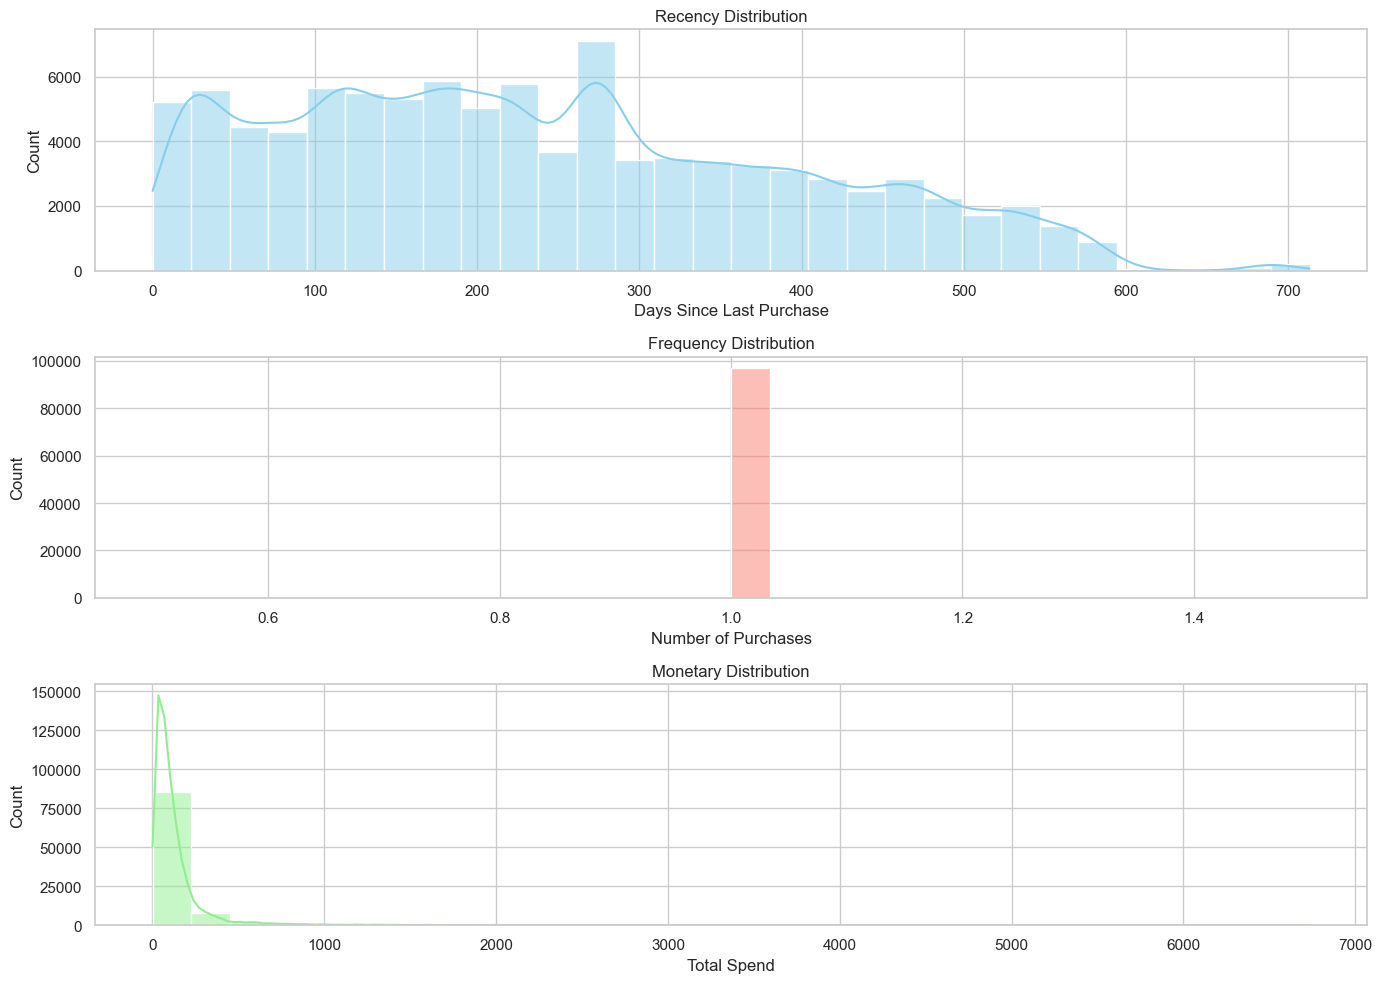

In [62]:

sns.set(style="whitegrid")
fig, axes = plt.subplots(3, figsize=(14, 10))

# Histogram for Recency
sns.histplot(rfm_data['Recency'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Days Since Last Purchase')

# Histogram for Frequency
sns.histplot(rfm_data['Frequency'], bins=30, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Number of Purchases')

# Histogram for Monetary
sns.histplot(rfm_data['Monetary'], bins=30, kde=True, color='lightgreen', ax=axes[2])
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Total Spend')



plt.tight_layout()
plt.show()


In [45]:
# Filter dataset for valid lat/lng
location_data = all_merged[(all_merged['customer_lat'] != 0) & (all_merged['customer_lng'] != 0)]

# Calculate central location for the map view
mean_lat = location_data['customer_lat'].mean()
mean_lng = location_data['customer_lng'].mean()


m = folium.Map(location=[mean_lat, mean_lng], zoom_start=5)

for _, row in location_data.iterrows():
    folium.Marker(
        location=[row['customer_lat'], row['customer_lng']],
        popup=f"Customer ID: {row['customer_id']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

m

## Conclusion

- Jumlah User Saat ini adalah 
- Berdasarkan status order, **98.3%** proses order sudah selesai. Dan **1.7%** order sedang berlangsung 
- Perkembangan Order setiap tahun selalu bertambah, dari **2016 hanya 332 order**, sampai terjadi kenaikan drastis pada tahun **2017 sehingga terjadi 46380 order**. Kenaikan order juga terjadi pada tahun selanjutnya yaitu **2018 hingga 55926 order**
- Persebaran Order Review sampai saat ini masih didominasi oleh Rating 5 sehingga dapat disimpulkan bahwa **pelanggan puas dengan order yang terjadi**
- Kategory terbaik adalah **bed_bath_table** yang berhasil terjual sebanyak **10220 items** & Kategory terburuk adalah **security_and_services** yang hanya berhasil terjual sebanyak **2 items**
- State yang melakukan order terbanyak adalah **San Paolu** dengan Order sebanyak **5548** dan State yang melakukan order paling sedikit adalah **Roraima** dengan order sebanyak **15**
- Berdasarkan analysis order terakhir terjadi pada tanggal **2018-09-03** yang berarti sudah **2245 hari** semenjak order terakhir terjadi

RFM Conculusion:\
Recency:\
Recency digunakan untuk mengetahui jumlah hari transaksi yang pelanggan lakukan terakhir kali. Jika grafik menunjukkan Skewed menuju low value, berarti terdapat beberapa pelanggan yang baru saja malekukan pemesanan

Frequency:\
Frequency digunakan untuk mengetahui jumlah transaksi yang biasanya pelanggan gunakan. Dalam grafik dapat disimpulkan bahwa pelanggan hanya melakukan 1 kali transaksi

Monetary:\
Monetary digunakan untuk mengetahui jumlah pengeluaran yang dilakukan pelanggan. Kelompok pelanggan yang melakukan monetary sedikit sebaiknya diberikan promo bundling, sementara kelompok pelanggan yang melakukan monetary besar sebaiknya diberikan diskon